<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

trn = pd.read_csv('train.csv')

### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

In [785]:
trn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

In [787]:
trn.isnull().sum()[trn.isnull().sum() != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [788]:
trn['Age'].isnull().sum()
miss_age =  trn['Age'].isnull().sum()

In [789]:
trn['Cabin'].isnull().sum()
miss_cabin = trn['Cabin'].isnull().sum()

In [790]:
trn['Embarked'].isnull().sum()
miss_em = trn['Embarked'].isnull().sum()

<BarContainer object of 3 artists>

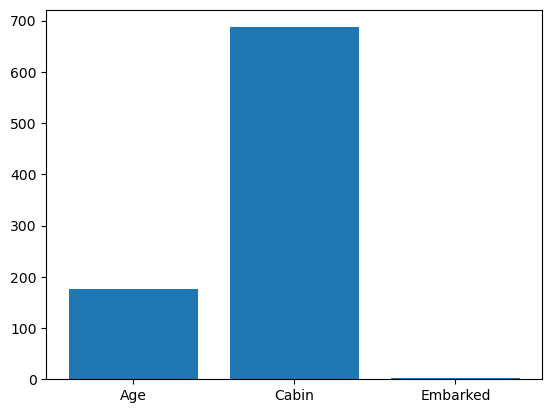

In [791]:
plt.bar(height= [miss_age,miss_cabin,miss_em], x = ['Age', 'Cabin', 'Embarked'])

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [793]:
trn.isna().sum()
# the most NaN values column is Cabin, there are 687 cells are empty

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  3. Delete all rows where `Embarked` is empty

In [795]:
trn= trn.dropna(subset=['Embarked'])

In [796]:
#check
trn.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [798]:
trn = trn.fillna('¯\(ツ)/¯')

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/7x/s9nb0bqj3xj0g6l2sm78vqcm0000gn/T/ipykernel_67049/2542172393.py:1: SyntaxWarning: invalid escape sequence '\('
  trn = trn.fillna('¯\(ツ)/¯')


In [799]:
#check
trn.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [802]:
trn['FamilyCount'] = trn['SibSp'] + trn['Parch']

In [803]:
trn.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [804]:
trn = trn.iloc[:, [0,1,2,3,4, 5, 6,7,12,8,9,10,11]]
trn.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamilyCount,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,PC 17599,71.2833,C85,C


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [806]:
trn['IsReverend'] = trn['Name'].str.contains('Rev').astype(int)

In [807]:
trn[trn['IsReverend'] == 1].count()

PassengerId    6
Survived       6
Pclass         6
Name           6
Sex            6
Age            6
SibSp          6
Parch          6
FamilyCount    6
Ticket         6
Fare           6
Cabin          6
Embarked       6
IsReverend     6
dtype: int64

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [809]:
emb_dummies = pd.get_dummies(trn['Embarked'], dtype=int)

In [810]:
sex_dummies = pd.get_dummies(trn['Sex'], dtype=int)

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [814]:
trn['Survived'].isnull().sum()

0

In [815]:
print(trn[trn['Survived']==1].count())
print(trn[trn['Survived']==0].count())
# What was the survival rate overall? = 340/(340+549) = 38.24%

PassengerId    340
Survived       340
Pclass         340
Name           340
Sex            340
Age            340
SibSp          340
Parch          340
FamilyCount    340
Ticket         340
Fare           340
Cabin          340
Embarked       340
IsReverend     340
dtype: int64
PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            549
SibSp          549
Parch          549
FamilyCount    549
Ticket         549
Fare           549
Cabin          549
Embarked       549
IsReverend     549
dtype: int64


In [816]:
(340/(340+549))*100

38.24521934758155

#### 2. Which gender fared the worst? What was their survival rate?

In [818]:
trn.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  FamilyCount  \
Sex    Survived                                                              
female 0                  81      81    81   81     81     81           81   
       1                 231     231   231  231    231    231          231   
male   0                 468     468   468  468    468    468          468   
       1                 109     109   109  109    109    109          109   

                 Ticket  Fare  Cabin  Embarked  IsReverend  
Sex    Survived                                             
female 0             81    81     81        81          81  
       1            231   231    231       231         231  
male   0            468   468    468       468         468  
       1            109   109    109       109         109

In [819]:
result = ((468/(468+109))*100)

In [820]:
# finding the gender that die the most
print (f'males are die the most with the percentage of 4 {result}')

males are die the most with the percentage of 4 81.10918544194108


#### 3. What was the survival rate for each `Pclass`?

In [822]:
trn['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [823]:
overall = trn.groupby(['Pclass','Survived']).count()
total_per_class = trn.groupby('Pclass')['FamilyCount'].count()
result = trn.groupby(['Pclass', 'Survived'])['FamilyCount'].count()
percentage = (result/ total_per_class) *100
percentage

Pclass  Survived
1       0           37.383178
        1           62.616822
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: FamilyCount, dtype: float64

#### 4. Did any reverends survive? How many?`

In [825]:
trn['IsReverend'].value_counts()

IsReverend
0    883
1      6
Name: count, dtype: int64

In [826]:
trn.groupby(['IsReverend','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  \
IsReverend Survived                                                      
0          0                 543     543   543  543  543    543    543   
           1                 340     340   340  340  340    340    340   
1          0                   6       6     6    6    6      6      6   

                     FamilyCount  Ticket  Fare  Cabin  Embarked  
IsReverend Survived                                              
0          0                 543     543   543    543       543  
           1                 340     340   340    340       340  
1          0                   6       6     6      6         6

In [827]:
# None of them is survived 

#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [829]:
survived_cabins = trn[trn['Cabin'] == '¯\(ツ)/¯']['Survived'].mean()
print(survived_cabins)

0.29985443959243085


<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/7x/s9nb0bqj3xj0g6l2sm78vqcm0000gn/T/ipykernel_67049/215641261.py:1: SyntaxWarning: invalid escape sequence '\('
  survived_cabins = trn[trn['Cabin'] == '¯\(ツ)/¯']['Survived'].mean()


#### 6. What is the survival rate for people whose `Age` is empty?

In [831]:
trn[trn['Age'] == '¯\(ツ)/¯'].count()

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/7x/s9nb0bqj3xj0g6l2sm78vqcm0000gn/T/ipykernel_67049/905320663.py:1: SyntaxWarning: invalid escape sequence '\('
  trn[trn['Age'] == '¯\(ツ)/¯'].count()


PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age            177
SibSp          177
Parch          177
FamilyCount    177
Ticket         177
Fare           177
Cabin          177
Embarked       177
IsReverend     177
dtype: int64

In [832]:
survived_age_empty = trn[trn['Age'] == '¯\(ツ)/¯']['Survived'].mean()
print(survived_age_empty)

0.2937853107344633


<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/7x/s9nb0bqj3xj0g6l2sm78vqcm0000gn/T/ipykernel_67049/1958121749.py:1: SyntaxWarning: invalid escape sequence '\('
  survived_age_empty = trn[trn['Age'] == '¯\(ツ)/¯']['Survived'].mean()


####  7. What is the survival rate for each port of embarkation?

In [834]:
whole = trn.groupby(['Embarked','Survived']).count()
total_per_em = trn.groupby('Embarked')['FamilyCount'].count()
result = trn.groupby(['Embarked', 'Survived'])['FamilyCount'].count()
percentage = (result/ total_per_em) *100
percentage

Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: FamilyCount, dtype: float64

#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [836]:
trn['Age'].value_counts()

Age
¯\(ツ)/¯    177
24.0        30
22.0        27
18.0        26
28.0        25
          ... 
36.5         1
55.5         1
0.92         1
23.5         1
74.0         1
Name: count, Length: 89, dtype: int64

In [837]:
trn['Age'].apply(pd.to_numeric, errors = 'coerce')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [838]:
# convert str to int forcing str to NaN
trn['Age'] = pd.to_numeric(trn['Age'], errors='coerce')

In [850]:
age_lessthan12.groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [848]:
age_lessthan12 = trn[trn['Age'] < 12]
survived_lessthan12 = age_lessthan12.groupby('Pclass')['Survived'].mean()


for p_class, rate_survived in survived_lessthan12.items():
    print(f'Pclass {p_class}: {rate_survived:.2%}')

Pclass 1: 75.00%
Pclass 2: 100.00%
Pclass 3: 40.43%


####  9. Did the captain of the ship survive? Is he on the list?

In [878]:
# get the title of each people
def get_title(full_name):
    name_split = full_name.split()
    return name_split[1]

In [882]:
trn['title'] = trn['Name'].apply(get_title)
trn['title'].value_counts()

title
Mr.             502
Miss.           178
Mrs.            120
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: count, dtype: int64

In [884]:
trn[trn['title'] == 'Capt.']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamilyCount,Ticket,Fare,Cabin,Embarked,IsReverend,title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,2,WE/P 5735,71.0,B22,S,0,Capt.


In [ ]:
# captain did not survived 

#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [926]:
die = trn[trn['Survived'] ==0]
max_fare = die['Fare'].max()
print(f'The dead person that has the maximum ticket fare is ${max_fare}')

The dead person that has the maximum ticket fare is $263.0


#### 11. Does having family on the boat help or hurt your chances of survival?

In [958]:
# find the one that has family member and survived 
survived_candi = trn[trn['Survived'] ==1]
survived_have_fam = survived_candi[survived_candi['FamilyCount'] >= 1]
survived_have_fam['PassengerId'].count()

179

In [956]:
# find the one that dont have family member and survived 
survived_candi = trn[trn['Survived'] ==1]
survived_have_fam = survived_candi[survived_candi['FamilyCount'] == 0]
survived_have_fam['PassengerId'].count()

161

In [968]:
by_percent = survived_have_fam['PassengerId'].count()/ ((survived_have_fam['PassengerId'].count())+(survived_have_fam['PassengerId'].count()))
print(f' Therefore, one that have family coming along with them tends to have a higher proportion of survival rate')
print(f' which is {by_percent:.2%}')

 Therefore, one that have family coming along with them tends to have a higher proportion of survival rate
 which is 50.00%


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [995]:
#import seabon
import seaborn as sns

#creating a function to make chart
def plot_chart(X, Y, df):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=X, y=Y, data=df)
    plt.title(f'Survival Rate by {X}')
    plt.ylabel('Survival Rate')
    plt.show()

In [997]:
trn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'FamilyCount', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'IsReverend', 'title'],
      dtype='object')

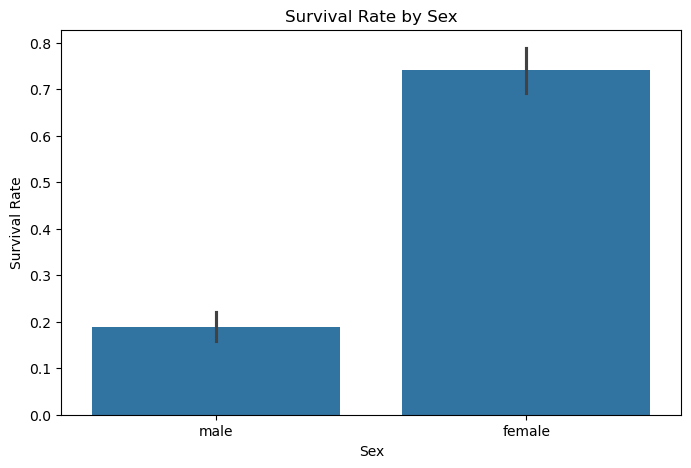

In [1003]:
#Survival rate by Gender group
plot_chart('Sex', 'Survived', trn)

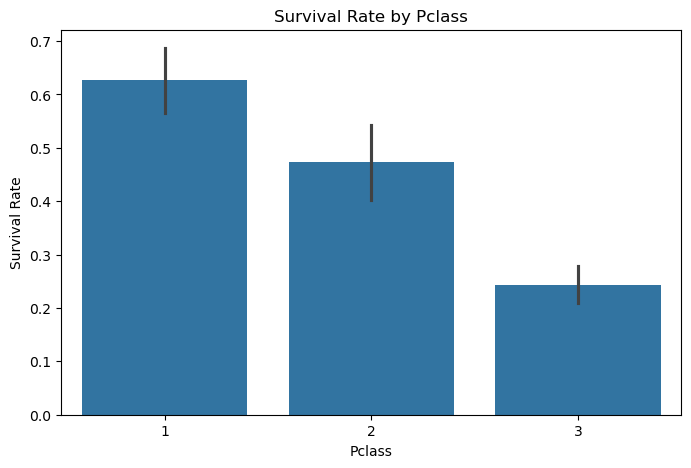

In [1008]:
#Survival rate by Pclass group
plot_chart('Pclass', 'Survived', trn)

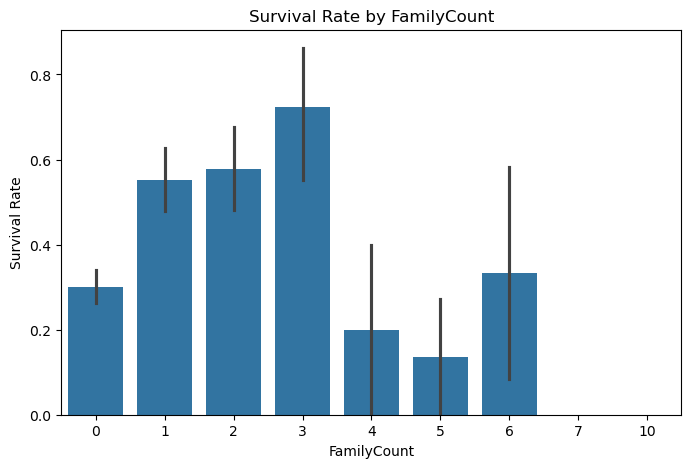

In [1010]:
#Survival rate by who have family member and dont group
plot_chart('FamilyCount', 'Survived', trn)

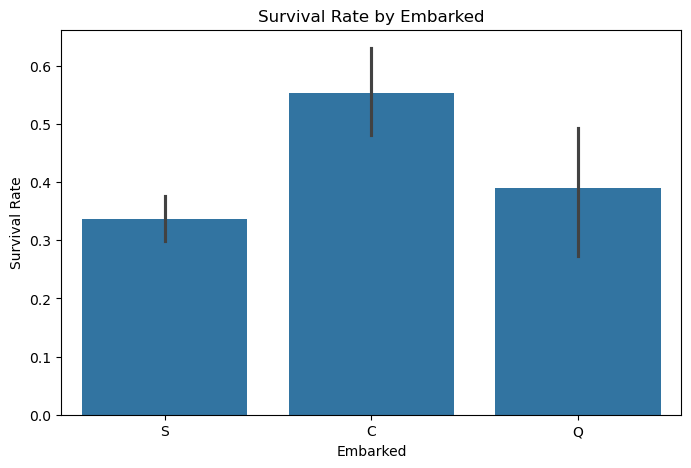

In [1012]:
#Survival rate by Embarked group
plot_chart('Embarked', 'Survived', trn)